Notebook following:
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#id14v

# Numpy implementation

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [13]:
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

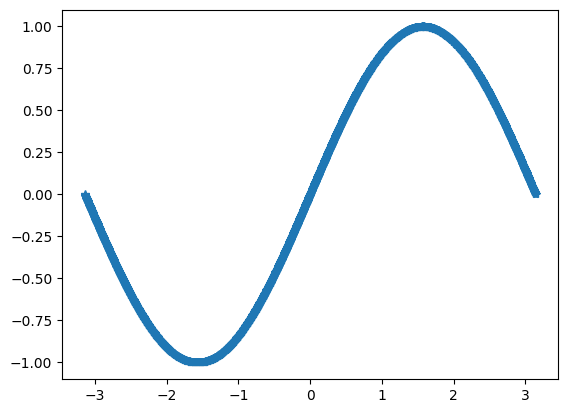

In [16]:
plt.plot(x, y, marker="*")

In [20]:
a, b, c, d = (np.random.randn() for i in range(4))

In [22]:
learning_rate = 1e-6

In [30]:
for t in range(2000):
    y_pred = a + b*x + c*x**2 + d*x**3
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # backprop
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x**2).sum()
    grad_d = (grad_y_pred * x**3).sum()

    # update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
print(list(zip(

99 408.6533658297981
199 289.8069603016652
299 206.36745620092574
399 147.7592581740172
499 106.57462412496075
599 77.62171001049829
699 57.259730293428426
799 42.93425075634949
899 32.85215145521715
999 25.754135512899953
1099 20.755412091102922
1199 17.23405803972622
1299 14.752745913721668
1399 13.003836765615228
1499 11.770843742312776
1599 10.90137251748753
1699 10.288111918482217
1799 9.855474070087414
1899 9.550201207308497
1999 9.334758863839147
Result: y = -0.023699491013945882 + 0.8528180042475023 x + 0.004088556561138366 x^2 + -0.09277239937794127 x^3


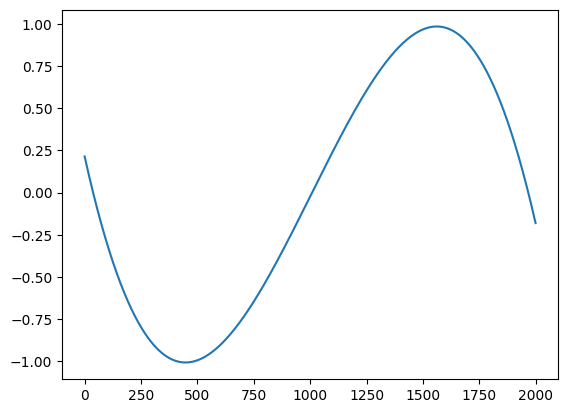

In [32]:
plt.plot(y_pred)

# PyTorch Implementation

In [33]:
import torch
import math

In [35]:
dtype = torch.float
device_str = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device_str)

In [38]:
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

In [40]:
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

In [42]:
learning_rate = 1e-6

for t in range(2000):
    # forward pass
    y_pred = a + b*x + c*x**2 + d*x**3
    
    # compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x**2).sum()
    grad_d = (grad_y_pred * x**3).sum()
    
        # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    
    
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

Result: y = -0.08451184630393982 + 0.8493756651878357 x + 0.01457969844341278 x^2 + -0.09228275716304779 x^3


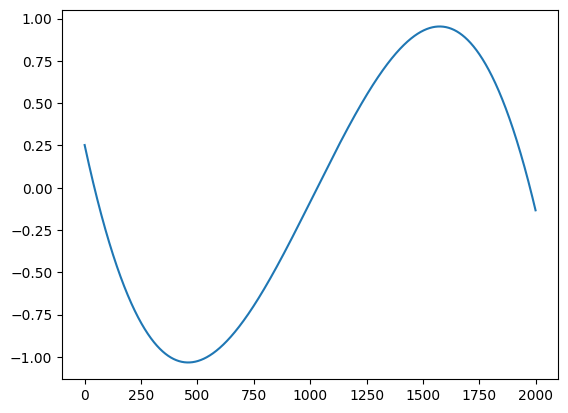

In [47]:
plt.plot(y_pred.to("cpu").numpy())

# Autograd

In [ ]:
# missing from the tutorial?

# Using torch.nn

In [104]:
import torch
import torch.nn as nn
import math

In [123]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x).to(device)

In [124]:
p = torch.tensor([1,2,3])
xx = x.unsqueeze(-1).pow(p).to(device)

In [125]:
model = torch.nn.Sequential(
    nn.Linear(3, 1),
    nn.Flatten(0, 1),
)
model = model.to(device)

In [126]:
loss_fn = nn.MSELoss(reduction='sum')

In [127]:
learning_rate = 1e-6

In [128]:
for t in range(2000):
    y_pred = model(xx)
    
    loss = loss_fn(y_pred, y)
    
    if t % 100 == 99:
        print(t, loss.item())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
    
linear_layer = model[0]
    

99 1172.8592529296875
199 783.1744995117188
299 524.140625
399 351.895751953125
499 237.3202362060547
599 161.07701110839844
699 110.32144165039062
799 76.51876831054688
899 53.99678421020508
999 38.983551025390625
1099 28.97093963623047
1199 22.28980255126953
1299 17.82923126220703
1399 14.849496841430664
1499 12.857780456542969
1599 11.525616645812988
1699 10.63404655456543
1799 10.036895751953125
1899 9.63669204711914
1999 9.368263244628906


In [129]:
y_pred.size()

torch.Size([2000])

In [133]:
y_pred.to("cpu").detach().numpy()

array([ 0.18605158,  0.18022388,  0.17441267, ..., -0.15695459,
       -0.16268048, -0.16842279], dtype=float32)

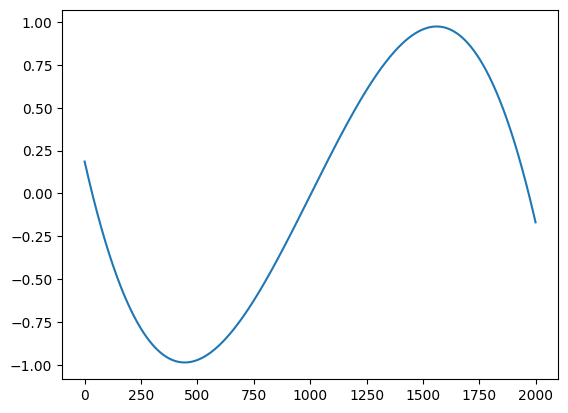

In [135]:
plt.plot(y_pred.to("cpu").detach().numpy())

# Optim

In [137]:
# Missing?